In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## Load the dataset
dataframe = pd.read_csv("housing.csv", delim_whitespace=True,header=None)
dataset = dataframe.values
X_train = dataset[:400,0:13]
Y_train = dataset[:400,13]
X_test = dataset[401:,0:13]
Y_test = dataset[401:,13]


In [49]:
##define base model
def base_model():
     model = Sequential()
     model.add(Dense(14, input_dim=13, init='normal', activation='relu'))
     model.add(Dense(256, init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     model.compile(loss='mean_squared_error', optimizer = 'adam')
     return model

seed = 7
np.random.seed(seed)

In [50]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
clf = KerasRegressor(build_fn=base_model, nb_epoch=100, batch_size=5,verbose=0)
clf.fit(X_test,Y_test)


/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, activation="relu", input_dim=13, kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


In [58]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(Y_test, clf.predict(X_test))
score = mean_absolute_error(Y_train, clf.predict(X_train))
score


11.851161926269532

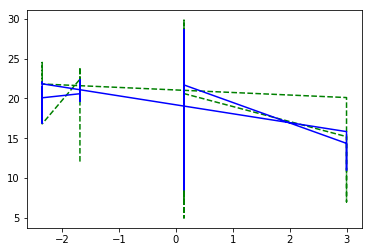

In [56]:
import matplotlib.pyplot as plt
plt.plot(X_test[:,2],Y_test,'g--')
plt.plot(X_test[:,2],clf.predict(X_test),'b')
plt.show()

In [69]:
scores=[]
scores2=[]
v=[]
for i in range(1,50,1):
    ##define base model
    def base_model():
        model = Sequential()
        model.add(Dense(14, input_dim=13, init='normal', activation='relu'))
        model.add(Dense(i, init='normal', activation='relu'))
        model.add(Dense(1, init='normal'))
        model.compile(loss='mean_squared_error', optimizer = 'adam')
        return model
    seed = 7
    np.random.seed(seed)
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.fit_transform(X_test)
    clf = KerasRegressor(build_fn=base_model, nb_epoch=100, batch_size=5,verbose=0)
    clf.fit(X_test,Y_test)
    from sklearn.metrics import mean_absolute_error
    score = mean_absolute_error(Y_test, clf.predict(X_test))
    scores.append(score)
    v.append(i)
    score = mean_absolute_error(Y_train, clf.predict(X_train))
    scores2.append(score)

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, activation="relu", input_dim=13, kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="relu", kernel_initializer="normal")`
/ho

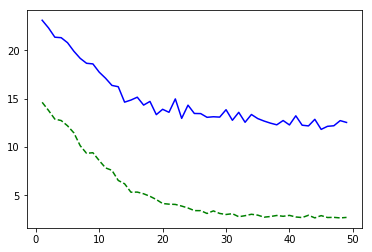

In [70]:
import matplotlib.pyplot as plt
plt.plot(v,scores,'g--')
plt.plot(v,scores2,'b')
plt.show()